<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


Missing values in Industry:
36579


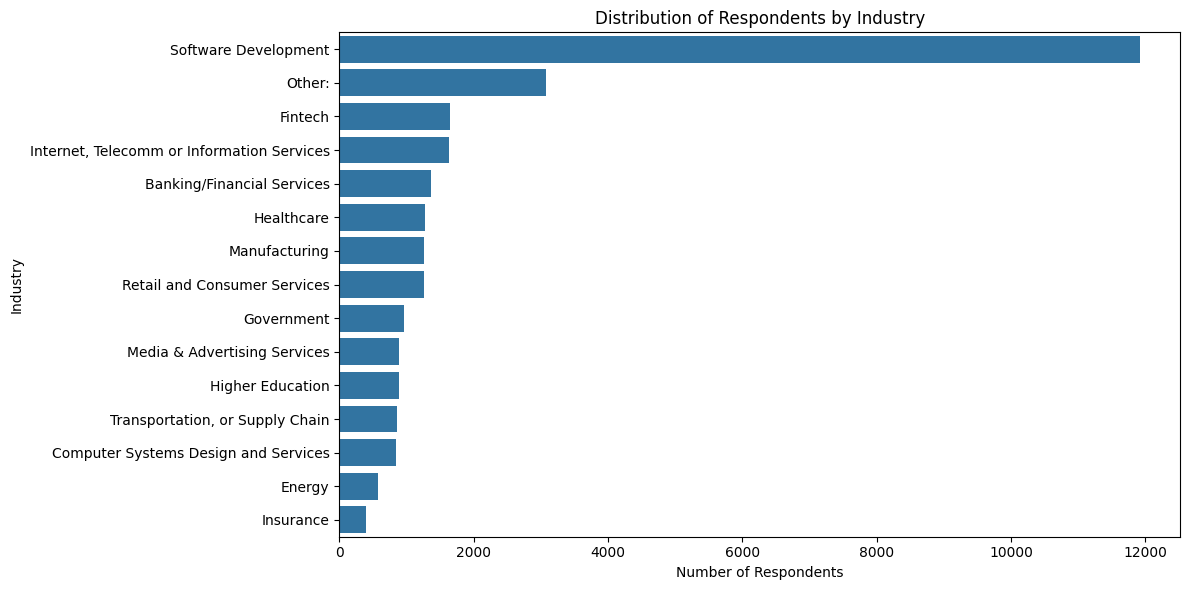

In [4]:
# Explore distribution of respondents across industries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check that the Industry column exists
print("Missing values in Industry:")
print(df["Industry"].isnull().sum())

# Drop missing Industry values for analysis
industry_df = df.dropna(subset=["Industry"])

# Get industry counts
industry_counts = industry_df["Industry"].value_counts()

# ---- Bar chart: Distribution by industry ----
plt.figure(figsize=(12, 6))
sns.barplot(
    x=industry_counts.values,
    y=industry_counts.index
)

plt.title("Distribution of Respondents by Industry")
plt.xlabel("Number of Respondents")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:
# Identify respondents with extremely high yearly compensation

import pandas as pd

# Ensure ConvertedCompYearly is numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Drop missing values for analysis
comp_df = df.dropna(subset=["ConvertedCompYearly"])

# ---- Basic statistics ----
mean_comp = comp_df["ConvertedCompYearly"].mean()
median_comp = comp_df["ConvertedCompYearly"].median()
std_comp = comp_df["ConvertedCompYearly"].std()

print("Compensation Statistics:")
print(f"Mean: {mean_comp}")
print(f"Median: {median_comp}")
print(f"Standard Deviation: {std_comp}")

# ---- Identify extremely high compensation (mean + 3*std) ----
threshold = mean_comp + 3 * std_comp
high_earners = comp_df[comp_df["ConvertedCompYearly"] > threshold]

print(f"\nHigh compensation threshold (Mean + 3*STD): {threshold}")
print(f"Number of respondents above threshold: {high_earners.shape[0]}")

# Optional: view top extreme values
print("\nTop extreme compensation values:")
print(high_earners["ConvertedCompYearly"].sort_values(ascending=False).head())

Compensation Statistics:
Mean: 86155.28726264134
Median: 65000.0
Standard Deviation: 186756.97308629754

High compensation threshold (Mean + 3*STD): 646426.206521534
Number of respondents above threshold: 89

Top extreme compensation values:
15837    16256603.0
12723    13818022.0
28379     9000000.0
17593     6340564.0
17672     4936778.0
Name: ConvertedCompYearly, dtype: float64


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th percentile): 32712.0
Q3 (75th percentile): 107971.5
IQR: 75259.5
Lower bound: -80177.25
Upper bound: 220860.75
Number of outliers: 978


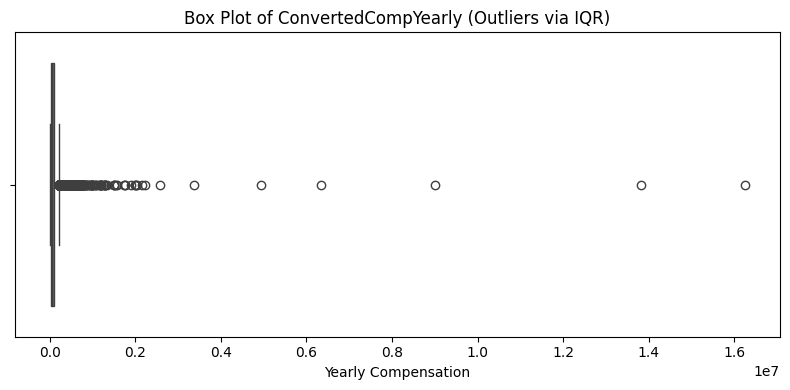

In [6]:
# Identify outliers in ConvertedCompYearly using the IQR method

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure ConvertedCompYearly is numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Drop missing values
comp_df = df.dropna(subset=["ConvertedCompYearly"])

# ---- Calculate IQR ----
Q1 = comp_df["ConvertedCompYearly"].quantile(0.25)
Q3 = comp_df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

# ---- Determine outlier bounds ----
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# ---- Identify outliers ----
outliers = comp_df[
    (comp_df["ConvertedCompYearly"] < lower_bound) |
    (comp_df["ConvertedCompYearly"] > upper_bound)
]

print(f"Number of outliers: {outliers.shape[0]}")

# ---- Visualize with box plot ----
plt.figure(figsize=(8, 4))
sns.boxplot(x=comp_df["ConvertedCompYearly"])
plt.title("Box Plot of ConvertedCompYearly (Outliers via IQR)")
plt.xlabel("Yearly Compensation")
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [7]:
# Remove outliers from ConvertedCompYearly using the IQR method

import pandas as pd

# Ensure ConvertedCompYearly is numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Drop rows with missing compensation
comp_df = df.dropna(subset=["ConvertedCompYearly"])

# ---- Recalculate IQR ----
Q1 = comp_df["ConvertedCompYearly"].quantile(0.25)
Q3 = comp_df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ---- Create new DataFrame without outliers ----
df_no_outliers = comp_df[
    (comp_df["ConvertedCompYearly"] >= lower_bound) &
    (comp_df["ConvertedCompYearly"] <= upper_bound)
]

# ---- Validate dataset sizes ----
print("Original dataset size (after dropping NaNs):", comp_df.shape)
print("Dataset size after removing outliers:", df_no_outliers.shape)

Original dataset size (after dropping NaNs): (23435, 114)
Dataset size after removing outliers: (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Correlation of Age with other numerical variables:
Age_Numeric            1.000000
WorkExp                0.848803
ConvertedCompYearly    0.122133
JobSat                 0.069818
CompTotal             -0.002698
JobSatPoints_1        -0.027675
ResponseId            -0.038245
JobSatPoints_8        -0.046204
JobSatPoints_6        -0.050017
JobSatPoints_4        -0.076150
JobSatPoints_9        -0.081759
JobSatPoints_7        -0.083232
JobSatPoints_5        -0.101560
JobSatPoints_11       -0.107170
JobSatPoints_10       -0.114571
Name: Age_Numeric, dtype: float64


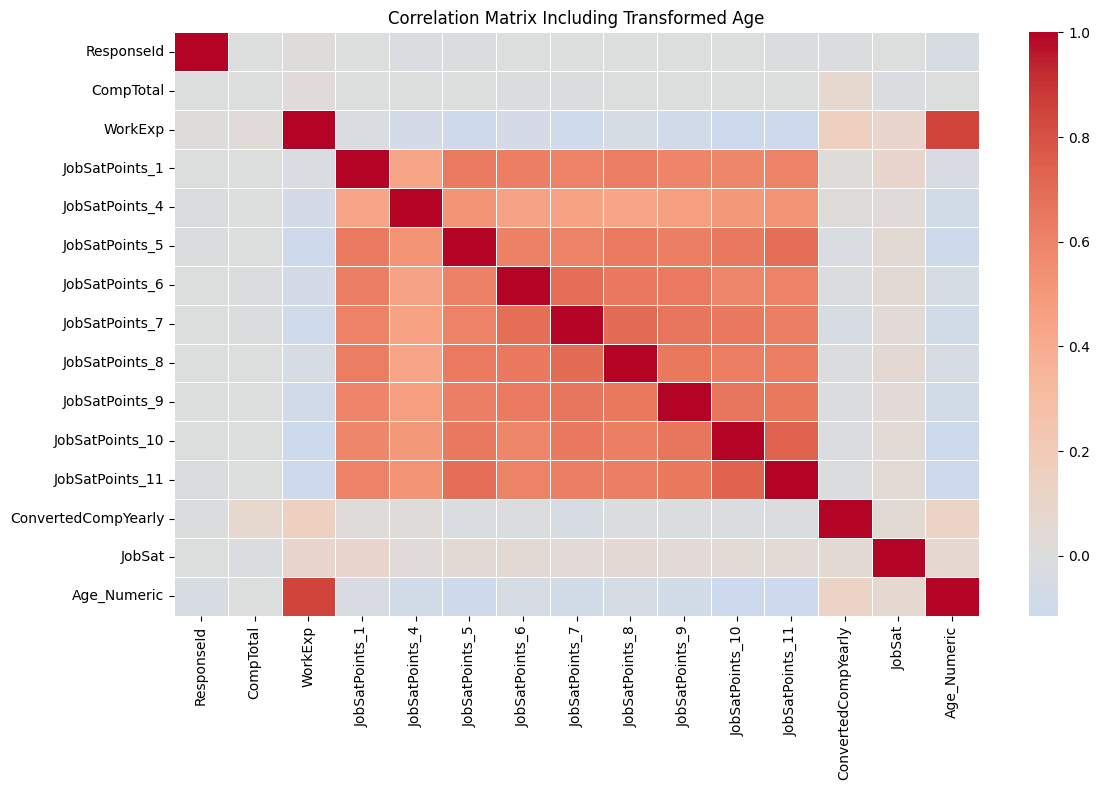

In [8]:
# Analyze correlation between Age (transformed) and other numerical columns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- 1. Map Age categories to approximate numeric values ----
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}

df["Age_Numeric"] = df["Age"].map(age_map)

# ---- 2. Select numeric columns (including transformed Age) ----
numeric_df = df.select_dtypes(include="number").copy()

# Drop rows with missing Age_Numeric
numeric_df = numeric_df.dropna(subset=["Age_Numeric"])

# ---- 3. Compute correlation matrix ----
corr_matrix = numeric_df.corr()

print("Correlation of Age with other numerical variables:")
print(corr_matrix["Age_Numeric"].sort_values(ascending=False))

# ---- 4. Visualize correlation matrix ----
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Matrix Including Transformed Age")
plt.tight_layout()
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
